# Credit Card Default Prediction
The data set consists of 2000 samples from each of two categories. Five variables are

Income
Age
Loan
Loan to Income (engineered feature)
Default

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
card=pd.read_csv("https://raw.githubusercontent.com/ybifoundation/Dataset/main/Credit%20Default.csv")

In [3]:
card.head()

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1


In [4]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.2 KB


In [6]:
card.describe()

,Income,Age,Loan,Loan to Income,Default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45331.600018,40.927143,4444.369695,0.098403,0.141500
std,14326.327119,13.262450,3045.410024,0.057620,0.348624
min,20014.489470,18.055189,1.377630,0.000049,0.000000
25%,32796.459720,29.062492,1939.708847,0.047903,0.000000
50%,45789.117310,41.382673,3974.719418,0.099437,0.000000
75%,57791.281670,52.596993,6432.410625,0.147585,0.000000
max,69995.685580,63.971796,13766.051240,0.199938,1.000000


In [8]:
card['Default'].value_counts()

0    1717
1     283
Name: Default, dtype: int64

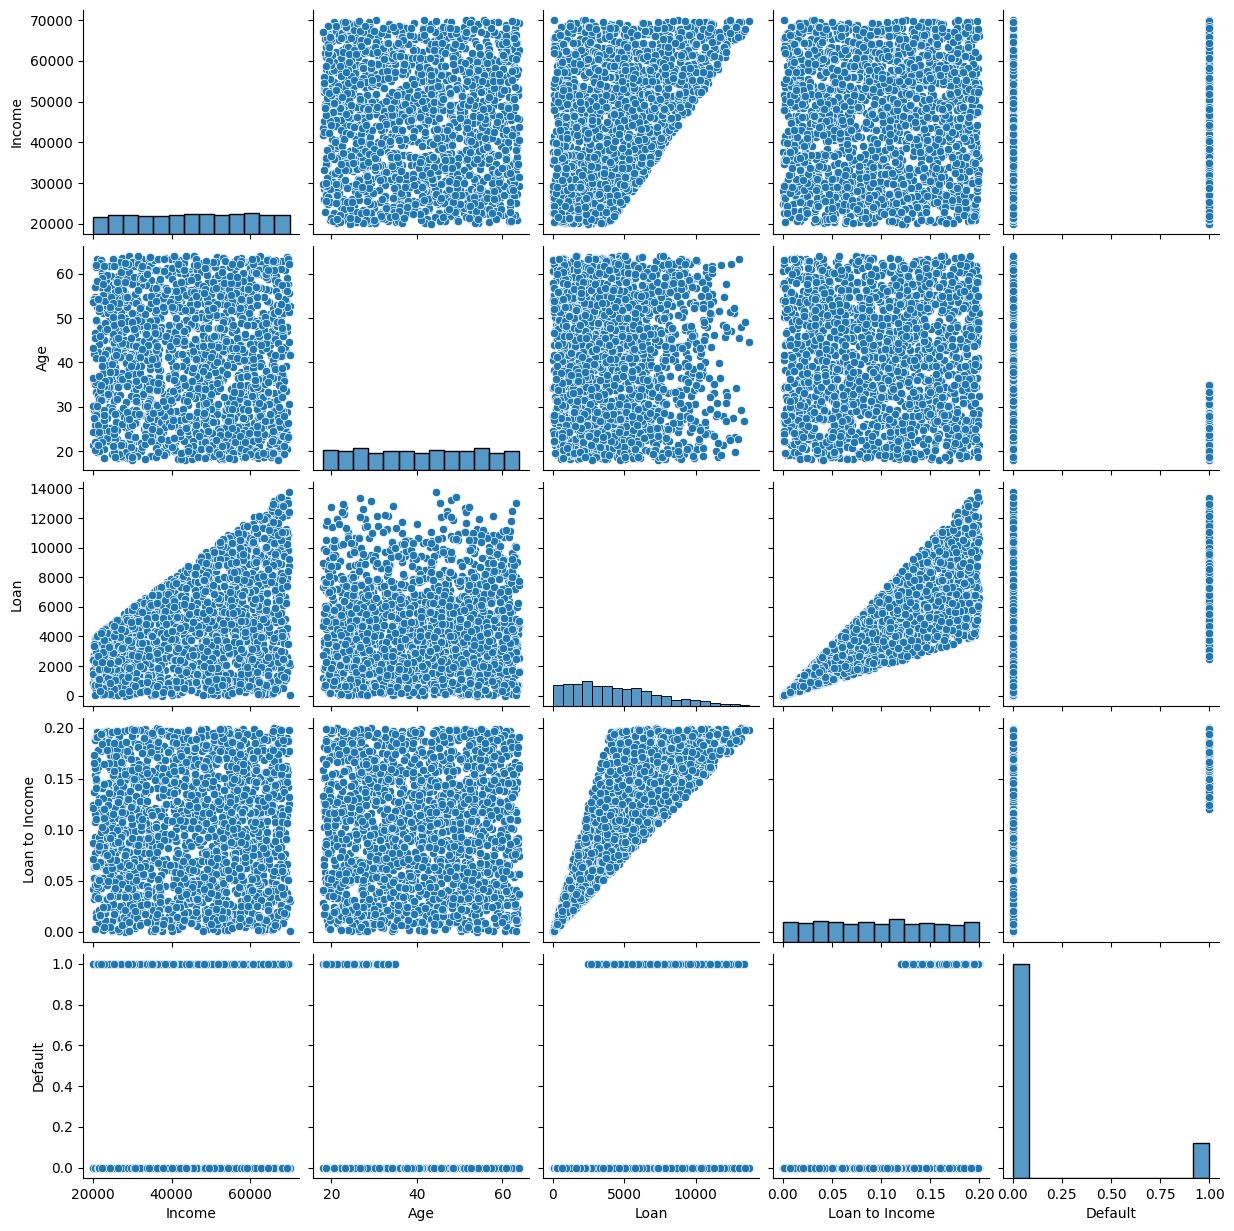

In [9]:
sns.pairplot(card)

C:\Users\Aneesh\AppData\Local\Temp\ipykernel_21172\1001266367.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=card['Age'],bins=10)


<Axes: ylabel='Density'>

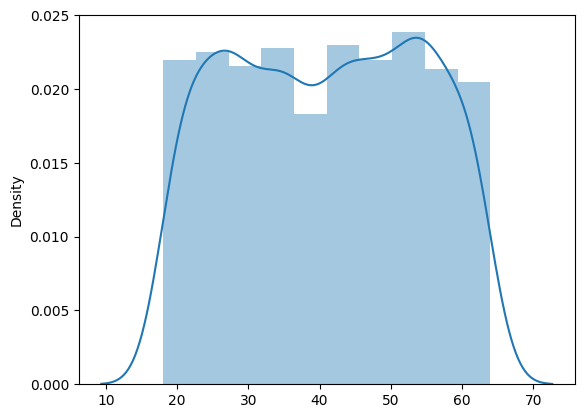

In [10]:
sns.distplot(x=card['Age'],bins=10)

C:\Users\Aneesh\AppData\Local\Temp\ipykernel_21172\1789962800.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=card['Loan'],bins=10)


<Axes: ylabel='Density'>

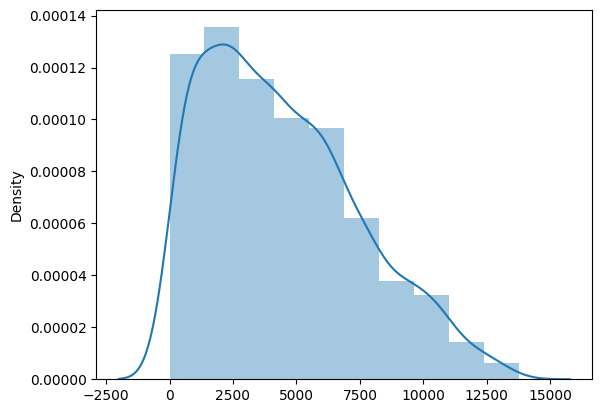

In [11]:
sns.distplot(x=card['Loan'],bins=10)

<Axes: xlabel='Age', ylabel='Loan'>

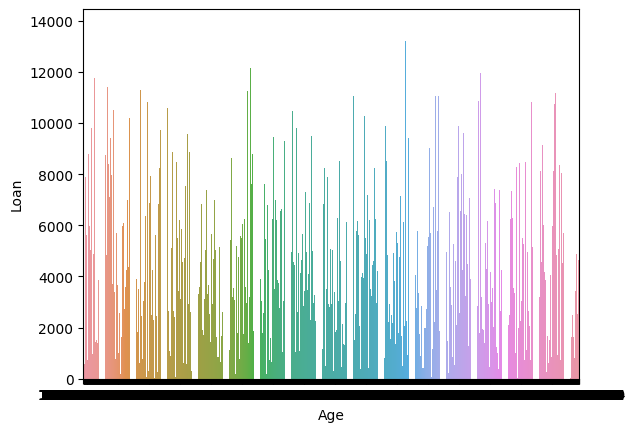

In [16]:
sns.barplot(x=card['Age'],y=card['Loan'])

In [18]:
card.corr()

,Income,Age,Loan,Loan to Income,Default
Income,1.000000,-0.034984,0.441117,-0.019862,0.002284
Age,-0.034984,1.000000,0.006561,0.021588,-0.444765
Loan,0.441117,0.006561,1.000000,0.847495,0.377160
Loan to Income,-0.019862,0.021588,0.847495,1.000000,0.433261
Default,0.002284,-0.444765,0.377160,0.433261,1.000000


<Axes: >

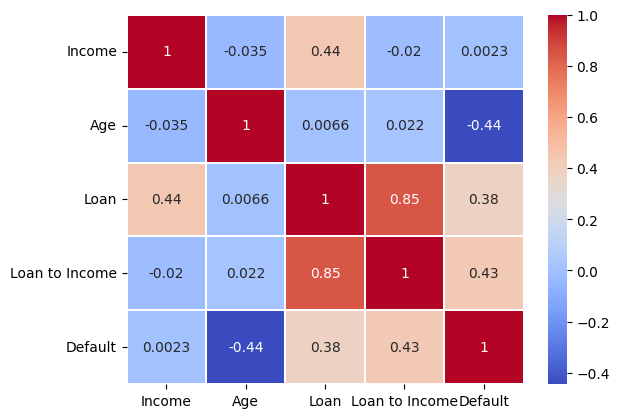

In [21]:
sns.heatmap(card.corr(),annot=True,linewidths=0.15,cmap='coolwarm')

In [23]:
X=card.drop(['Default'],axis=1)

In [24]:
y=card['Default']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=42)

In [28]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1500, 4), (500, 4), (1500,), (500,))

In [29]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
y_pred=model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Training Score:",model.score(X_train,y_train))
print("Testing Score:",model.score(X_test,y_test))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Training Score: 1.0
Testing Score: 0.998
Accuracy Score: 0.998


In [34]:
df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
1860,1,1
353,1,1
1333,0,0
905,0,0
1289,0,0
...,...,...
765,0,0
1356,0,0
408,0,0
1614,0,0


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       1.00      0.99      0.99        78

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500



In [40]:
confusion_matrix(y_test,y_pred)

array([[422,   0],
       [  1,  77]], dtype=int64)